In [117]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [103]:
path_0321 = os.getcwd()+"/zx07_20210321_SimPull_results"
path_0325 = os.getcwd()+"/zx07_20210325_SimPull_results"
path_0408 = os.getcwd()+"/zx07_20210408_SimPull_results"
df_0321 = pd.read_csv(path_0321+'/QC.csv')
df_0325 = pd.read_csv(path_0325+'/QC.csv')
df_0408 = pd.read_csv(path_0408+'/QC.csv')

In [95]:
def split_well(df):
    well_split = df.Well.str.split(r'X|Y', expand=True)
    df['X'] = well_split[1].astype('int')
    df['Y'] = well_split[2].astype('int')
    return df

def tag_df(df, x_factor = 0, rep=2):
    #df.loc[df.X == x_factor, 'Conc'] = '0'
    df.loc[df.X == x_factor, 'Conc'] = 0
    if rep == 1:
        df.loc[df.X != x_factor, 'Conc_fac'] = (df.X-x_factor + df.Y-1).astype('int')
        df.loc[(df.X != x_factor)&((df.X-x_factor) % 2 == 0), 'Conc_fac'] = (df.X-x_factor + df.Y+1).astype('int')
    if rep == 2:
        df.loc[(df.X == x_factor + 1)|(df.X == x_factor + 4), 'Conc_fac'] = (df.X-x_factor + df.Y-1).astype('int')
        df.loc[(df.X == x_factor + 2), 'Conc_fac'] = (df.X-x_factor + df.Y-2).astype('int')
        df.loc[(df.X == x_factor + 3), 'Conc_fac'] = (df.X-x_factor + df.Y).astype('int')

    #df.loc[df.X != x_factor, 'Conc'] = (10**df.Conc_fac/1000).astype('str') + ' nM'
    df.loc[df.X != x_factor, 'Conc'] = 10**df.Conc_fac/1000
    return df

def process_0321(df):
    df = split_well(df)
    df.loc[(df.X == 1)|(df.X == 3)|(df.X == 6)|(df.X == 8), 'rep'] = 1
    df.loc[(df.X == 2)|(df.X == 4)|(df.X == 7)|(df.X == 9), 'rep'] = 2
    df.loc[(df.Well=='X0Y0')|(df.Well=='X5Y0'), 'rep'] = 1
    df.loc[(df.Well=='X0Y1')|(df.Well=='X5Y1'), 'rep'] = 2
    
    
    
    df_A = df.loc[df.X <= 4]
    df_B = df.loc[df.X > 4]
    
    df_A = tag_df(df_A)
    df_B = tag_df(df_B, x_factor=5)
    
    df_A['Cond'] = 'Antibody'
    df_B['Cond'] = 'Nanobody'
    
    df_A = df_A.loc[df_A.rep >= 1]
    df_B = df_B.loc[df_B.rep >= 1]
    
    df = pd.concat([df_A, df_B])
    return df

def process_0325(df):
    df = split_well(df)
    df = df.loc[(df.Well !='X0Y1')&(df.Well !='X0Y2')&(df.Well !='X3Y1')&(df.Well !='X3Y2') ]
    df['rep'] = 3

    df_A = df.loc[df.X <= 2]
    df_B = df.loc[df.X > 2]
    
    df_A = tag_df(df_A, rep=1)
    df_B = tag_df(df_B, x_factor=3,rep=1)
    
    df_A['Cond'] = 'Antibody'
    df_B['Cond'] = 'Nanobody'
    
    #df = pd.concat([df_A, df_B])
    return df_A

def process_0408(df):
    df = split_well(df)
    df = df.loc[(df.Y == 0)|(df.Well == 'X0Y1')]
    df = df.loc[(df.X != 3)&(df.X != 5)&(df.X <=7)]
    df['rep'] = 3
    df['Cond'] = 'Nanobody'
    df.loc[df.Y == 1, 'Conc'] = 0
    df.loc[df.Well == 'X0Y0', 'Conc'] = 0.001
    df.loc[df.Well == 'X1Y0', 'Conc'] = 0.01
    df.loc[df.Well == 'X2Y0', 'Conc'] = 0.1
    df.loc[df.Well == 'X4Y0', 'Conc'] = 1
    df.loc[df.Well == 'X6Y0', 'Conc'] = 10
    df.loc[df.Well == 'X7Y0', 'Conc'] = 100
    
    return df

In [104]:
df_0321 = process_0321(df_0321)
df_0325 = process_0325(df_0325)
df_0408 = process_0408(df_0408)
df = pd.concat([df_0321, df_0325, df_0408])
df = df.sort_values(by=['Conc'])
df_qc = df
df_qc.Conc = df_qc.Conc.astype('str') + ' nM'

In [126]:
df_antibody_1 = df_qc.loc[(df_qc.Cond == 'Antibody')&(df_qc.rep==1)]
df_antibody_2 = df_qc.loc[(df_qc.Cond == 'Antibody')&(df_qc.rep==2)]
df_antibody_3 = df_qc.loc[(df_qc.Cond == 'Antibody')&(df_qc.rep==3)]
df_nanobody_1 = df_qc.loc[(df_qc.Cond == 'Nanobody')&(df_qc.rep==1)]
df_nanobody_2 = df_qc.loc[(df_qc.Cond == 'Nanobody')&(df_qc.rep==2)]
df_nanobody_3 = df_qc.loc[(df_qc.Cond == 'Nanobody')&(df_qc.rep==3)]

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


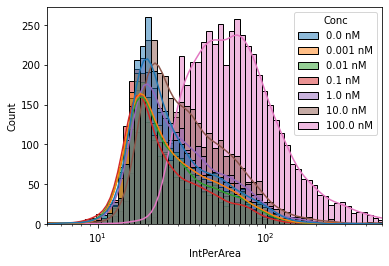

In [107]:
# QC Antibody 1
fig = plt.figure()
ax = sns.histplot(data=df_antibody_1, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.xlim(5, 500)
plt.show()

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


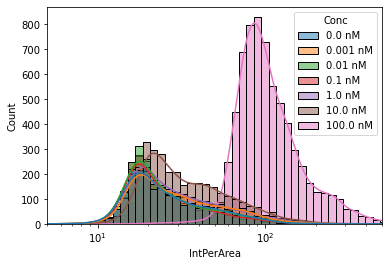

In [108]:
# QC Antibody 2
fig = plt.figure()
ax = sns.histplot(data=df_antibody_2, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.xlim(5, 500)
plt.show()

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


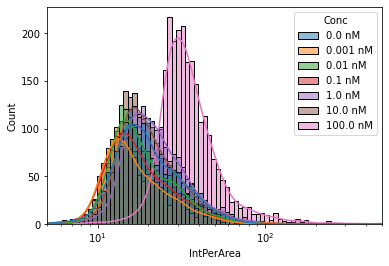

In [109]:
# QC Antibody 3
fig = plt.figure()
ax = sns.histplot(data=df_antibody_3, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.xlim(5, 500)
plt.show()

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


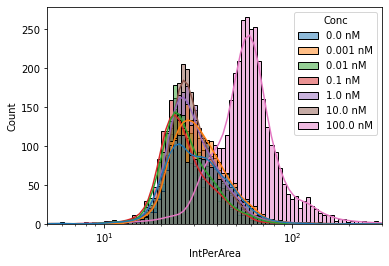

In [110]:
# QC Nanobody 1
fig = plt.figure()
ax = sns.histplot(data=df_nanobody_1, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.xlim(5, 300)
plt.show()

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


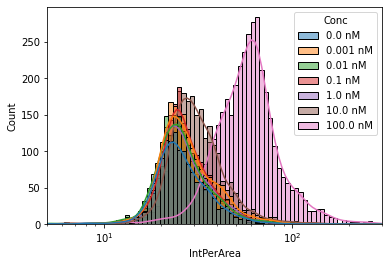

In [111]:
# QC Nanobody 2
fig = plt.figure()
ax = sns.histplot(data=df_nanobody_2, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.xlim(5, 300)
plt.show()

In [128]:
df_nanobody_3[np.isfinite(df_nanobody_3['IntPerArea'])]

,Well,Abs_frame,NArea,IntegratedInt,IntPerArea,X,Y,rep,Conc,Conc_fac,Cond
2015,X0Y1,R2W4C0,14,69.80000,4.985714,0,1,3.0,0.0 nM,NaN,Nanobody
2014,X0Y1,R2W4C0,32,311.71429,9.741072,0,1,3.0,0.0 nM,NaN,Nanobody
2013,X0Y1,R2W4C0,37,523.40000,14.145946,0,1,3.0,0.0 nM,NaN,Nanobody
2012,X0Y1,R2W4C0,19,71.00000,3.736842,0,1,3.0,0.0 nM,NaN,Nanobody
2011,X0Y1,R2W4C0,20,128.09091,6.404546,0,1,3.0,0.0 nM,NaN,Nanobody
...,...,...,...,...,...,...,...,...,...,...,...
50995,X7Y0,R1W1C0,34,185.00000,5.441176,7,0,3.0,100.0 nM,NaN,Nanobody
50994,X7Y0,R1W1C0,15,102.25000,6.816667,7,0,3.0,100.0 nM,NaN,Nanobody
51007,X7Y0,R1W1C0,19,175.90909,9.258373,7,0,3.0,100.0 nM,NaN,Nanobody
56340,X7Y0,R3W4C0,15,218.60000,14.573333,7,0,3.0,100.0 nM,NaN,Nanobody


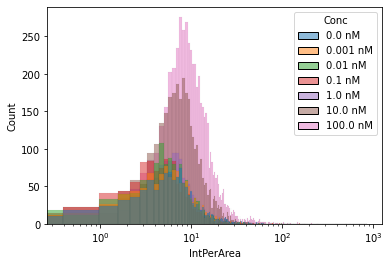

In [131]:
# QC Nanobody 3
fig = plt.figure()
ax = sns.histplot(data=df_nanobody_3, x='IntPerArea', hue='Conc')
ax.set_xscale('log')
#plt.xlim(5, 300)
plt.show()

In [14]:
def thresholding(df, thre):
    df = df.loc[df.IntPerArea >= thre]
    df = df.groupby(['Conc', 'Abs_frame', 'rep', 'Cond']).size()
    df = df.reset_index(drop=False)
    df = df.groupby(['Conc', 'rep', 'Cond']).mean()
    df = df.reset_index(drop=False)
    return df

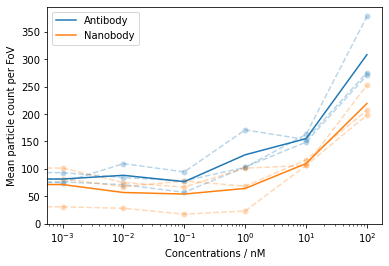

In [149]:
df_antibody_thre = pd.concat([thresholding(df_antibody_1, 20), thresholding(df_antibody_2, 18), thresholding(df_antibody_3, 15)])
df_nanobody_thre = pd.concat([thresholding(df_nanobody_1, 23), thresholding(df_nanobody_2, 22), thresholding(df_nanobody_3, 10)])

fig5_df = pd.concat([df_antibody_thre, df_nanobody_thre])
fig5_df = fig5_df.sort_values(by=['Conc'])
fig5_df['Conc'] = (fig5_df['Conc'].str.slice(stop=-3)).astype('float')
fig5_df = fig5_df.rename(columns={0: "ParticlePerFoV"})
fig = plt.figure()
sns.lineplot(data=fig5_df.loc[fig5_df.Cond == 'Antibody'], x='Conc', y='ParticlePerFoV',hue='rep', linestyle='--', marker='o', palette=["C0","C0","C0"], legend=False, alpha=0.3)
sns.lineplot(data=fig5_df.loc[fig5_df.Cond == 'Nanobody'], x='Conc', y='ParticlePerFoV',hue='rep', linestyle='--', marker='o', palette=["C1","C1","C1"], legend=False, alpha=0.3)
ax = sns.lineplot(data=fig5_df, x='Conc', y='ParticlePerFoV', hue='Cond', err_style=None)
ax.set_xscale('log')
ax.legend(title='', loc=2)
ax.set_xlabel('Concentrations / nM')
ax.set_ylabel('Mean particle count per FoV')
plt.show()

In [147]:
# Calibration curve
def calc_FoVsize(pixel_size, x, y):
    #pixel_size in nm/pixel
    #return in um^2
    return ((pixel_size**2)*x*y)/(10**6)

In [150]:
df_calibration = fig5_df
df_calibration['ParticlePerum'] = df_calibration.ParticlePerFoV/calc_FoVsize(100,512,512)
df_anti_cali = df_calibration.loc[df_calibration.Cond == 'Antibody']
df_nano_cali = df_calibration.loc[df_calibration.Cond == 'Nanobody']

In [228]:
import numpy as np
from scipy import stats
import scipy.optimize as optimization

def fourPL(x, A, B, C, D):
    return ((A-D)/(1.0+((x/C)**(B))) + D)

def ifourPL(y, A, B, C, D):
    return C * (((A-D)/(y-D))-1)**(1/B)

def fitFPL(df, color):
    params, params_covariance = optimization.curve_fit(fourPL, df.Conc, df.ParticlePerum)#, maxfev=1)

    x_min, x_max = np.amin(df.Conc), np.amax(df.Conc)
    xs = np.linspace(x_min, x_max, 1000)
    plt.plot(xs, fourPL(xs, *params), color=color)

    
def checkFPL(df, v):
    params, params_covariance = optimization.curve_fit(fourPL, df.Conc, df.ParticlePerum)#, maxfev=1)

    return fourPL(v, *params)
    
    
def readFPL(df, LoD):
    params, params_covariance = optimization.curve_fit(fourPL, df.Conc, df.ParticlePerum)#, maxfev=1)
    
    return ifourPL(LoD, *params)

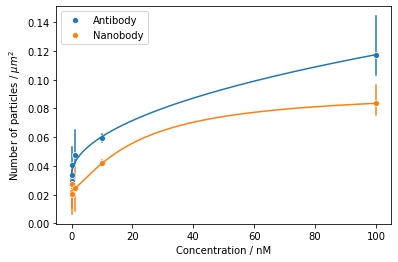

In [231]:
fig = plt.figure()
sns.lineplot(data=df_anti_cali, x='Conc', y='ParticlePerum', linestyle='', marker='o', err_style='bars', label='Antibody')
#sns.lineplot(data=df_anti_cali, x='Conc', y='ParticlePerum',hue='rep', linestyle='', marker='o', palette=["C0","C0","C0"], legend=False)
sns.lineplot(data=df_nano_cali, x='Conc', y='ParticlePerum', linestyle='', marker='o',err_style='bars', label='Nanobody')
fitFPL(df_anti_cali, sns.color_palette()[0])
fitFPL(df_nano_cali, sns.color_palette()[1])
plt.legend(loc=2)
plt.ylabel(r"Number of particles / $\mu m^{2}$")
plt.xlabel("Concentration / nM")
plt.show()

In [160]:
#antibody
#Mean blank 0.040549
#blank std 0.011374
LoB_anti = 0.040549 + 1.645 * 0.011374
df_anti_cali.loc[df_anti_cali.Conc == 0].std() 
LoB_anti

0.05925923

In [200]:
#nanobody
#Mean blank 0.040549
#blank std 0.008881
LoB_nano = 0.040549 + 1.645 * 0.011374
df_nano_cali.loc[df_nano_cali.Conc == 10]

,Conc,rep,Cond,ParticlePerFoV,ParticlePerum
5,10.0,1.0,Nanobody,106.222222,0.040521
5,10.0,2.0,Nanobody,116.277778,0.044356
5,10.0,3.0,Nanobody,106.333333,0.040563


In [235]:
def determine_lod(df, LowConcSample):
    meanblank = df.loc[df.Conc == 0].mean().ParticlePerum
    stdblank = df.loc[df.Conc == 0].std().ParticlePerum
    lob = meanblank + 1.645 * stdblank
    # testing if the LCS is valid
    fail_list = []
    df_LCS = df.loc[df.Conc == LowConcSample]
    if df_LCS.loc[df_LCS.rep == 1].ParticlePerum.values < lob:
        fail_list += ['rep 1('+str(df_LCS.loc[df_LCS.rep == 1].ParticlePerum.values) + ')']
    if df_LCS.loc[df_LCS.rep == 2].ParticlePerum.values < lob:
        fail_list += ['rep 2('+str(df_LCS.loc[df_LCS.rep == 2].ParticlePerum.values) + ')']        
    if df_LCS.loc[df_LCS.rep == 3].ParticlePerum.values < lob:
        fail_list += ['rep 3('+str(df_LCS.loc[df_LCS.rep == 3].ParticlePerum.values) + ')']
    
    if len(fail_list) == 0:
        stdLCS = df.loc[df.Conc == LowConcSample].std().ParticlePerum    
        lod = lob + 1.645 * stdLCS
        print('With low concentration sample: ' + str(LowConcSample) +' nM LoD is ' + str(lod))
        print('Calculated LoD concentration is: ' + str(readFPL(df, lod)))
        return '\t'
    else:
        print('With low concentration sample: '+ str(LowConcSample) +' nM ' + ','.join(fail_list) + ' falled below LoB('+str(lob)+')')
        return '\t'

In [236]:
LCS_list = [0.001, 0.01, 0.1, 1, 10, 100]
for i in LCS_list:
    print(determine_lod(df_anti_cali, i))

With low concentration sample: 0.001 nM rep 1([0.02907647]),rep 2([0.03549788]),rep 3([0.02856784]) falled below LoB(0.05925980674177952)
	
With low concentration sample: 0.01 nM rep 1([0.02710554]),rep 2([0.03204346]),rep 3([0.04174974]) falled below LoB(0.05925980674177952)
	
With low concentration sample: 0.1 nM rep 1([0.02180735]),rep 2([0.02979702]),rep 3([0.0360277]) falled below LoB(0.05925980674177952)
	
With low concentration sample: 1 nM rep 1([0.03935496]),rep 2([0.03916423]) falled below LoB(0.05925980674177952)
	
With low concentration sample: 10 nM rep 1([0.05675422]),rep 3([0.05853441]) falled below LoB(0.05925980674177952)
	
With low concentration sample: 100 nM LoD is 0.0972300107317939
Calculated LoD concentration is: 56.67992303864686
	


In [237]:
for i in LCS_list:
    print(determine_lod(df_nano_cali, i))

With low concentration sample: 0.001 nM rep 2([0.03123813]),rep 3([0.01173019]) falled below LoB(0.03630351121853624)
	
With low concentration sample: 0.01 nM rep 1([0.02861023]),rep 2([0.02574921]),rep 3([0.01068115]) falled below LoB(0.03630351121853624)
	
With low concentration sample: 0.1 nM rep 1([0.02543132]),rep 2([0.02971225]),rep 3([0.00664393]) falled below LoB(0.03630351121853624)
	
With low concentration sample: 1 nM rep 2([0.02608829]),rep 3([0.00883738]) falled below LoB(0.03630351121853624)
	
With low concentration sample: 10 nM LoD is 0.03992665407627411
Calculated LoD concentration is: 8.934278987063962
	
With low concentration sample: 100 nM LoD is 0.05477297321337854
Calculated LoD concentration is: 19.0633042518475
	
